#                        Projet sur les cantines

### 1 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 2 - Organisation du service 

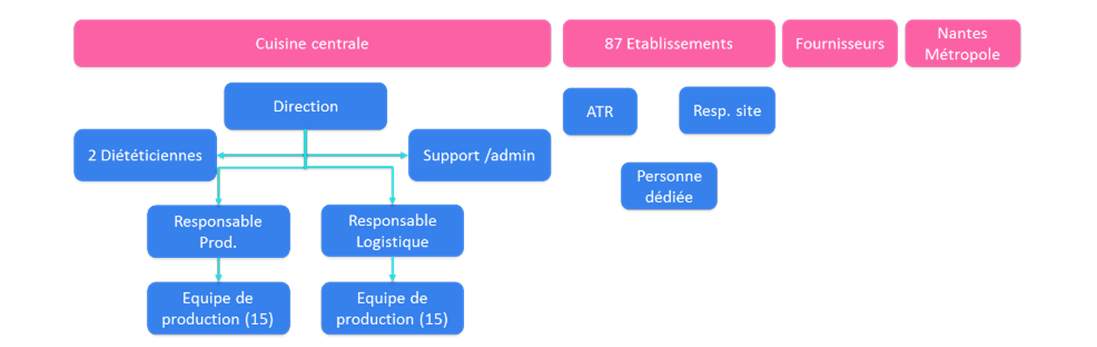

### 3 - Processus actuel

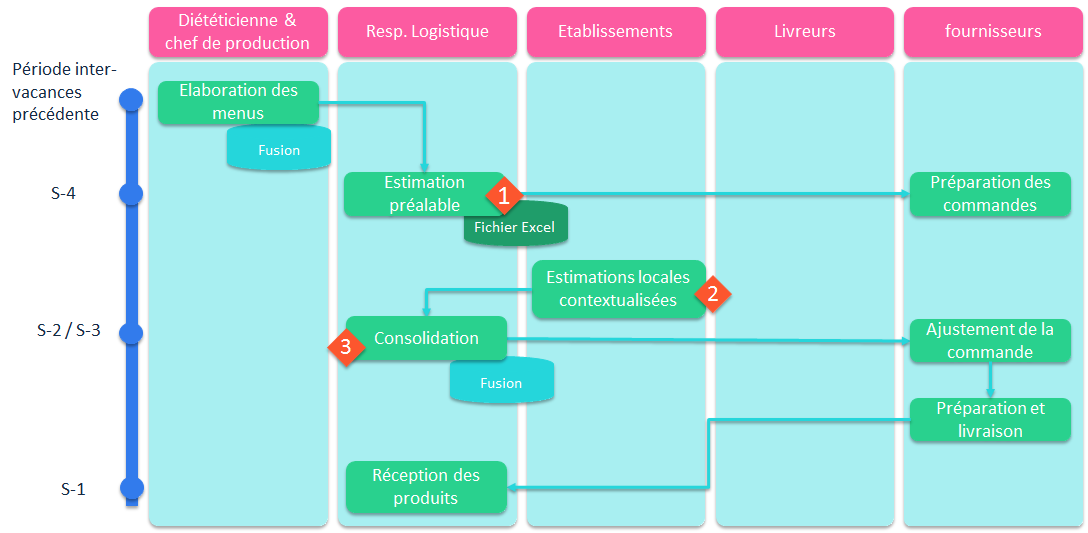

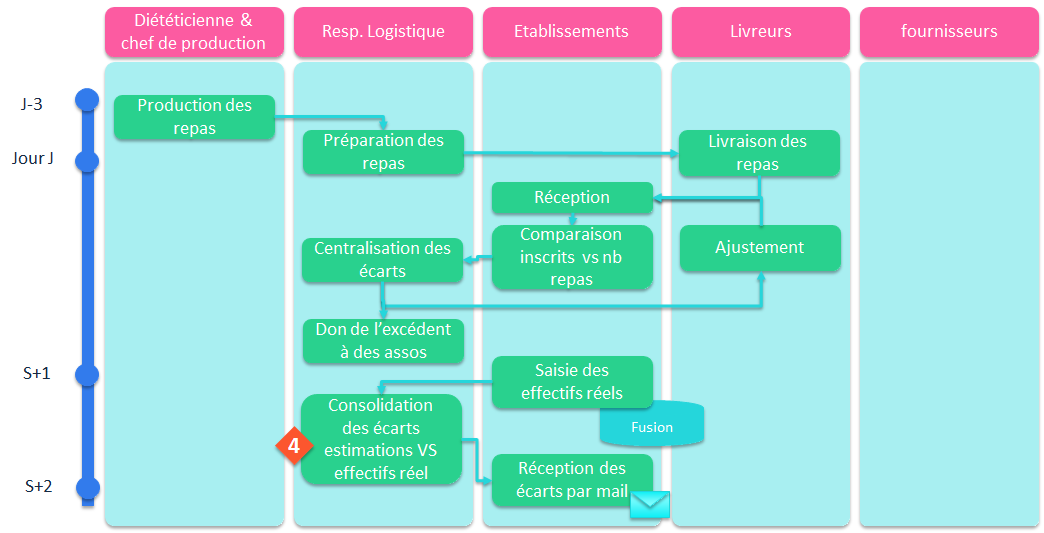

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 4 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 5 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [1]:
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [2]:
menu = pd.read_csv("menus.csv")
menu

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,1184,2019-12-10,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,1185,2019-12-13,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,1186,2019-12-16,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
frequentation = pd.read_csv("frequentation.csv")
frequentation

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15991,10898,20685
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15885,6442,20685
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,0,0,0,0,0,0,1274,9715,99,17436,9168,20685
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,16062,12371,20685


# Première étape, jointure entre menu et frequentation 

In [5]:
frequentation_menu = pd.merge(frequentation,menu, on = 'date', how= 'outer', indicator = 'merge_indicator')
frequentation_menu

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15991,10898,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15885,6442,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,0,0,0,0,0,0,1274,9715,99,17436,9168,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,16062,12371,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [6]:
#création d'une colonne permettant de connaître la fréquence d'élève mangeant à la cantine par jour
frequentation_menu["freq"] = frequentation_menu["reel"] / frequentation_menu["effectif"] * 100
frequentation_menu

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both,64.059172
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both,67.967536
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both,67.581880
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both,70.926150
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15991,10898,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both,52.685521
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15885,6442,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both,31.143341
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,0,0,0,0,0,0,1274,9715,99,17436,9168,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both,44.321972
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,16062,12371,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both,59.806623


# Deuxième étape on remarque des anomalies d'effectifs

In [7]:
frequentation_menu.groupby("annee_scolaire")["effectif"].unique()

annee_scolaire
2010-2011    [17373, 17652]
2011-2012    [17660, 17955]
2012-2013    [18123, 17842]
2013-2014           [18243]
2014-2015    [18633, 18497]
2015-2016           [19066]
2016-2017           [19639]
2017-2018           [19958]
2018-2019           [20344]
2019-2020           [20685]
Name: effectif, dtype: object

On remarque que certain effectif changent en cour d'année

<Axes: title={'center': '2010-2011'}>

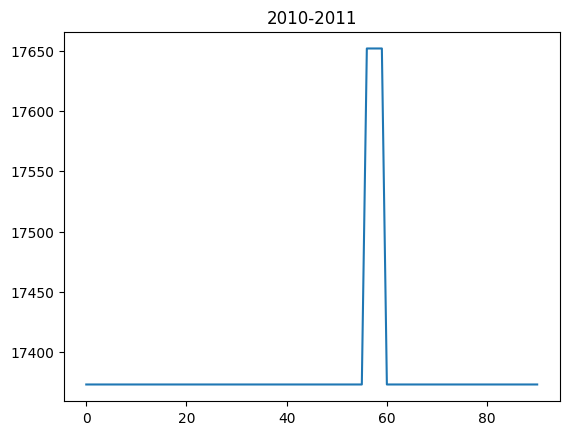

In [8]:
frequentation_menu [frequentation_menu.annee_scolaire =="2010-2011"]["effectif"].plot(title = "2010-2011")

Ca semble être une erreur ici 

<Axes: title={'center': '2011-2012'}>

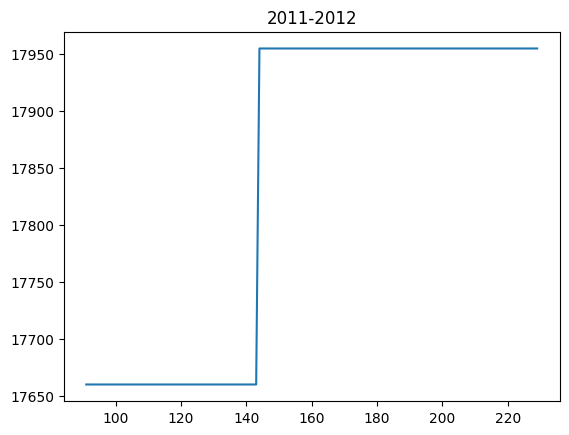

In [9]:
frequentation_menu [frequentation_menu.annee_scolaire =="2011-2012"]["effectif"].plot(title = "2011-2012")

ici l'evolution semble logique 

<Axes: title={'center': '2012-2013'}>

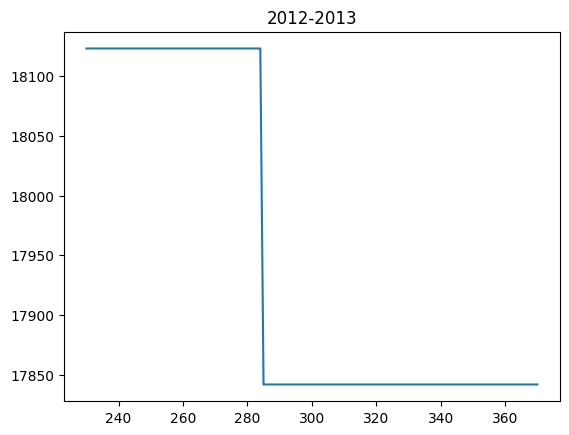

In [10]:
frequentation_menu [frequentation_menu.annee_scolaire =="2012-2013"]["effectif"].plot(title = "2012-2013")

<Axes: title={'center': '2014-2015'}>

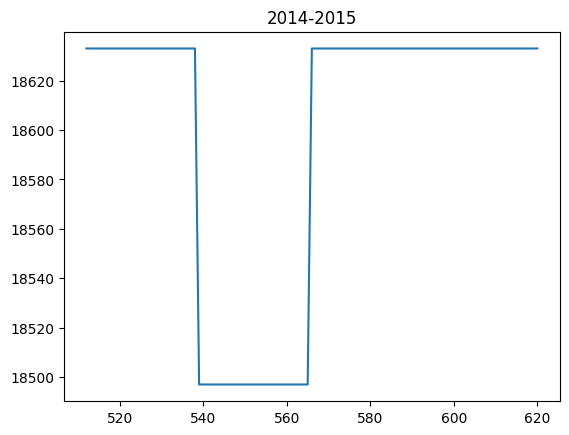

In [11]:
frequentation_menu [frequentation_menu.annee_scolaire =="2014-2015"]["effectif"].plot(title = "2014-2015")

je fais le choix de ne garder qu'un effectif pour les années ou il semble y avoir une erreur 

In [12]:
frequentation_menu = frequentation_menu.replace(17652, 17373) #2010-2011
frequentation_menu = frequentation_menu.replace(18497, 18633) #2014-2015

On verifie les changements

In [13]:
frequentation_menu[frequentation_menu["effectif"]==17652]

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


In [14]:
frequentation_menu[frequentation_menu["effectif"]==18497]

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


Les changements ont bien été effectués

# Supprimer les zéro

In [15]:
# Supprimer les lignes dans lesquelles la colonne 'reel' contient la valeur zéro
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['reel'] == 0].index)

In [16]:
frequentation_menu[frequentation_menu["reel"] == 0]

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


# Supprimer les Mercredis

Les jours mercredi représente des repas fait dans les centres de loisirs, ils sont donc inutiles

In [17]:
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['jour'] == 'Mercredi' ].index)

In [18]:
frequentation_menu[frequentation_menu["jour"] == 'Mercredi']

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


# Supprimer la colonne grève

In [19]:
frequentation_menu = frequentation_menu.drop('greves', axis=1)
frequentation_menu

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both,64.059172
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both,67.967536
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both,67.581880
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both,70.926150
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15991,10898,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both,52.685521
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15885,6442,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both,31.143341
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,0,0,0,0,0,0,0,0,0,0,1274,9715,99,17436,9168,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both,44.321972
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,0,0,0,0,0,0,0,0,0,0,1447,6839,441,16062,12371,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both,59.806623


# Supprimer les fréquences inférieures à 60%

In [20]:
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['freq'] < 60 ].index)

<Axes: >

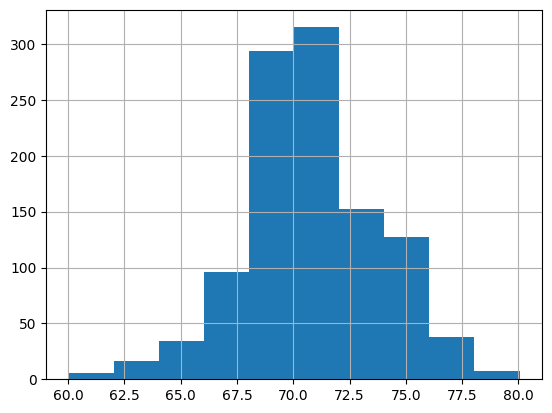

In [21]:
frequentation_menu.freq.hist()

# Supprimons la colonne vacances

In [22]:
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['vacances'] == 1 ].index)

In [23]:
frequentation_menu[frequentation_menu.vacances == 1].count()


Unnamed: 0_x       0
date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
Unnamed: 0_y       0
menu               0
porc               0
viande             0
poisson            0
bio                0
noel               0
frites             0
an_chinois         0
merge_indicator    0
freq               0
dtype: int64

# Supprimons les menus de grèves et les erreurs

In [24]:
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['jour'] == '[menu depannage]'].index)

In [25]:
frequentation_menu[frequentation_menu["menu"] == '[menu depannage]']

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


In [26]:
frequentation_menu = frequentation_menu.drop(frequentation_menu[frequentation_menu['menu'] == '[]'].index)
frequentation_menu[frequentation_menu["menu"] == '[]']

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


In [27]:
frequentation_menu= frequentation_menu.drop(frequentation_menu[frequentation_menu['menu'] == 'greves'].index)
frequentation_menu[frequentation_menu["menu"] == 'greves']

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


In [28]:
frequentation_menu= frequentation_menu.drop(frequentation_menu[frequentation_menu['menu'] == 'grève'].index)
frequentation_menu[frequentation_menu["menu"] == 'grève']

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq


In [29]:
frequentation_menu = frequentation_menu.drop('Unnamed: 0_x', axis=1)

In [30]:
frequentation_menu = frequentation_menu.drop('Unnamed: 0_y', axis=1)

In [31]:
frequentation_menu.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'merge_indicator', 'freq'],
      dtype='object')

# Prédictions pour le repas de noël

J'ai fait le choix de séparer mes prédictions de repas de noël des autres jours pour avoir un modèle plus performant que ce soit pour noël ou les autres jours

In [32]:
ind_noel = frequentation_menu[frequentation_menu['noel'] == 1].index

In [33]:
repas_noel = frequentation_menu.loc[ind_noel, ['date', 'effectif', 'reel', 'prevision']]
repas_noel

,date,effectif,reel,prevision
140,2011-12-12,17660,12594,13886
283,2012-12-20,18123,13535,14550
424,2013-12-19,18243,13959,14908
564,2014-12-18,18633,14447,15254
673,2015-12-17,19066,15162,15672
794,2016-12-15,19639,15722,16693
928,2017-12-21,19958,15153,16941
1058,2018-12-20,20344,15993,16962


In [34]:
y = repas_noel["reel"]

x = repas_noel["effectif"]

In [35]:
anova = smf.ols('reel ~ effectif -1' , data = repas_noel).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              6135.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                    1.46e-11
Time:                        15:40:01   Log-Likelihood:                         -60.960
No. Observations:                   8   AIC:                                      123.9
Df Residuals:                       7   BIC:                                      124.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Pour prévoir les jours de repas de noel on utilise cette formule : effectif * 0.79

In [36]:
repas_noel['prédictions'] = repas_noel['effectif'] * 0.79
repas_noel

,date,effectif,reel,prevision,prédictions
140,2011-12-12,17660,12594,13886,13951.40
283,2012-12-20,18123,13535,14550,14317.17
424,2013-12-19,18243,13959,14908,14411.97
564,2014-12-18,18633,14447,15254,14720.07
673,2015-12-17,19066,15162,15672,15062.14
794,2016-12-15,19639,15722,16693,15514.81
928,2017-12-21,19958,15153,16941,15766.82
1058,2018-12-20,20344,15993,16962,16071.76


In [37]:
repas_noel["marge_ziyan_noel"] = repas_noel["prédictions"] - repas_noel["reel"]
repas_noel["marge_ziyan_noel"] = repas_noel["marge_ziyan_noel"].astype(int)
repas_noel["marge_ecole_noel"] = repas_noel["prevision"] - repas_noel["reel"]
repas_noel

,date,effectif,reel,prevision,prédictions,marge_ziyan_noel,marge_ecole_noel
140,2011-12-12,17660,12594,13886,13951.40,1357,1292
283,2012-12-20,18123,13535,14550,14317.17,782,1015
424,2013-12-19,18243,13959,14908,14411.97,452,949
564,2014-12-18,18633,14447,15254,14720.07,273,807
673,2015-12-17,19066,15162,15672,15062.14,-99,510
794,2016-12-15,19639,15722,16693,15514.81,-207,971
928,2017-12-21,19958,15153,16941,15766.82,613,1788
1058,2018-12-20,20344,15993,16962,16071.76,78,969


In [38]:
(repas_noel['marge_ecole_noel'].sum() - repas_noel['marge_ziyan_noel'].sum()) / repas_noel['marge_ecole_noel'].sum() *100

60.86013733285146

# Grâce à ces prédictions on obtient 61% de gaspillage en moins pour les repas de noel

# Préparaton de l'analyse bi-varié

In [39]:
frequentation_menu = pd.get_dummies(frequentation_menu, columns= ["mois"],dtype='int')

In [40]:
frequentation_menu = pd.get_dummies(frequentation_menu, columns= ["jour"],dtype='int')

In [41]:
frequentation_menu

,date,annee_scolaire,semaine,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,merge_indicator,freq,mois_Avril,mois_Decembre,mois_Fevrier,mois_Janvier,mois_Juillet,mois_Juin,mois_Mai,mois_Mars,mois_Novembre,mois_Octobre,mois_Septembre,jour_Jeudi,jour_Lundi,jour_Mardi,jour_Vendredi
0,2011-01-03,2010-2011,1,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both,64.059172,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2011-01-04,2010-2011,1,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both,67.967536,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2011-01-06,2010-2011,1,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both,67.581880,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2011-01-07,2010-2011,1,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both,70.926150,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2011-01-10,2010-2011,2,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both,65.054970,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,2019-11-26,2019-2020,48,0,0,0,0,0,0,0,0,0,0,822,2764,103,15847,15954,20685,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,both,77.128354,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1179,2019-11-28,2019-2020,48,0,0,0,0,0,0,0,0,0,0,822,2764,103,15832,14864,20685,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,both,71.858835,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1180,2019-11-29,2019-2020,48,0,0,0,0,0,0,0,0,0,0,822,2764,103,17201,16423,20685,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,both,79.395697,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1181,2019-12-02,2019-2020,49,0,0,0,0,0,0,0,0,0,0,964,6926,478,16151,15265,20685,"['Salade coleslaw', 'Raviolis de légumes ', 'S...",0,0,0,0,0,0,0,both,73.797438,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Analyse bi-varié (corrélation)

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

Comme on regarde la corrélation entre des variables qualitatives et des variables quantitatives on utilise l'anova

In [43]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + fete_chretienne + ramadan + fete_juive + porc + viande + bio + poisson + frites + an_chinois + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Mardi  + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7169.7
No. Observations:                 980   AIC:                         1.440e+04
Df Residuals:                     948   BIC:                         1.456e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8663      0.015     

In [44]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + ramadan + fete_juive + porc + viande + bio + poisson + frites + an_chinois + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Mardi  + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     221.5
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7169.7
No. Observations:                 980   AIC:                         1.440e+04
Df Residuals:                     949   BIC:                         1.455e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8663      0.015     

In [45]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + fete_juive + porc + viande + bio + poisson + noel + frites + an_chinois + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Mardi + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     241.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7132.1
No. Observations:                 980   AIC:                         1.433e+04
Df Residuals:                     949   BIC:                         1.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8671      0.014     

In [46]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + fete_juive + porc + viande + bio + poisson + noel + frites + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Mardi + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     250.2
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7132.3
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     950   BIC:                         1.447e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8673      0.014     

In [47]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + fete_juive + porc + viande + bio + poisson + noel + frites + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     259.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7132.4
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     951   BIC:                         1.446e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8674      0.014     

In [48]:
anova = smf.ols('reel ~ effectif + veille_ferie + retour_ferie + retour_vacances +veille_vacances + fete_musulmane + fete_juive + porc + viande + bio + poisson + noel + frites + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + inc_grippe + inc_gastro + inc_varicelle + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     259.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7132.4
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     951   BIC:                         1.446e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8674      0.014     

In [49]:
anova = smf.ols('reel ~ effectif + veille_ferie + veille_vacances + fete_musulmane + porc + viande + bio + poisson + noel + frites + bio + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + inc_grippe + inc_varicelle + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7134.0
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     955   BIC:                         1.444e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8705      0.013     

In [50]:
anova = smf.ols('reel ~ effectif + veille_ferie + veille_vacances + fete_musulmane + porc + viande + poisson + noel + frites + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + inc_grippe + inc_varicelle + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     315.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7134.8
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     956   BIC:                         1.443e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8735      0.012     

In [51]:
anova = smf.ols('reel ~ effectif + veille_ferie + veille_vacances + fete_musulmane + viande + poisson + noel + frites + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + inc_grippe + inc_varicelle + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     329.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7135.7
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     957   BIC:                         1.443e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8723      0.012     

In [52]:
anova = smf.ols('reel ~ effectif + veille_ferie + veille_vacances + viande + poisson + noel + frites + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + inc_grippe + inc_varicelle + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7136.8
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     958   BIC:                         1.443e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8713      0.012     

In [53]:
anova = smf.ols('reel ~ effectif + veille_ferie + veille_vacances + viande + poisson + noel + frites + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + inc_grippe + inc_varicelle + mois_Septembre + mois_Octobre + mois_Novembre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -7136.8
No. Observations:                 980   AIC:                         1.432e+04
Df Residuals:                     958   BIC:                         1.443e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.8713      0.012     

In [54]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + poisson + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + mois_Decembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.170e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7238.4
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     964   BIC:                                  1.459e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [55]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + poisson + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.656e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7238.4
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     965   BIC:                                  1.458e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [56]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.208e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7238.6
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     966   BIC:                                  1.457e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [57]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Mai + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.208e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7238.6
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     966   BIC:                                  1.457e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [58]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Juin + mois_Juillet + mois_Septembre + mois_Octobre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.792e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7241.8
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     967   BIC:                                  1.457e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [59]:
anova = smf.ols('reel ~ effectif + veille_vacances + viande + mois_Janvier + mois_Fevrier + mois_Mars + mois_Avril + mois_Juin + mois_Juillet + mois_Septembre + jour_Lundi + jour_Vendredi -1' , data = frequentation_menu).fit()
print(anova.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.510e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:40:03   Log-Likelihood:                         -7243.0
No. Observations:                 980   AIC:                                  1.451e+04
Df Residuals:                     968   BIC:                                  1.457e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [60]:
# Liste des colonnes à conserver dans le nouveau DataFrame
anova_end = frequentation_menu[['effectif', 'annee_scolaire', 'reel', 'veille_vacances', 'viande', 'mois_Janvier', 'mois_Fevrier', 'mois_Mars', 'mois_Avril', 'mois_Juin', 'mois_Juillet', 'mois_Septembre', 'jour_Lundi', 'jour_Vendredi']]
anova_end

,effectif,annee_scolaire,reel,veille_vacances,viande,mois_Janvier,mois_Fevrier,mois_Mars,mois_Avril,mois_Juin,mois_Juillet,mois_Septembre,jour_Lundi,jour_Vendredi
0,17373,2010-2011,11129,0,1,1,0,0,0,0,0,0,1,0
1,17373,2010-2011,11808,0,1,1,0,0,0,0,0,0,0,0
2,17373,2010-2011,11741,0,1,1,0,0,0,0,0,0,0,0
3,17373,2010-2011,12322,0,0,1,0,0,0,0,0,0,0,1
4,17373,2010-2011,11302,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,20685,2019-2020,15954,0,1,0,0,0,0,0,0,0,0,0
1179,20685,2019-2020,14864,0,1,0,0,0,0,0,0,0,0,0
1180,20685,2019-2020,16423,0,0,0,0,0,0,0,0,0,0,1
1181,20685,2019-2020,15265,0,0,0,0,0,0,0,0,0,1,0


# Jeu de test et jeu d'entrainement 

In [61]:
anova_end_train = anova_end[anova_end['annee_scolaire'].isin(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018'])]

anova_end_test = anova_end[anova_end['annee_scolaire'].isin(['2018-2019'])]

In [62]:
xtrain = anova_end_train[['effectif', 'veille_vacances', 'viande', 'mois_Janvier', 'mois_Fevrier', 'mois_Mars', 'mois_Avril', 'mois_Juin', 'mois_Juillet', 'mois_Septembre', 'jour_Lundi', 'jour_Vendredi',]]

xtest =  anova_end_test[['effectif', 'veille_vacances', 'viande', 'mois_Janvier', 'mois_Fevrier', 'mois_Mars', 'mois_Avril' ,'mois_Juin', 'mois_Juillet', 'mois_Septembre', 'jour_Lundi', 'jour_Vendredi',]]

ytrain = anova_end_train[['reel']]

ytest = anova_end_test[['reel']]

# Régression linéaire 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [64]:
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression()

In [65]:
pred_train = regr.predict(xtrain)
pred_test = regr.predict(xtest)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
r2_score(ytrain, pred_train)

0.8595336136113574

In [68]:
r2_score(ytest, pred_test)

0.29285417038891803

In [69]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = pred_test * (1 + 0.0212)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1078,2019-02-26,15832,15291,20344,15091.175605,-199,541
1124,2019-06-11,15431,14971,20344,14773.650004,-197,460
1138,2019-07-05,15623,14157,20344,14066.005153,-90,1466
1126,2019-06-14,15888,15090,20344,15018.761659,-71,798
1093,2019-03-26,16048,15333,20344,15269.415293,-63,715
...,...,...,...,...,...,...,...
1097,2019-04-02,15837,13279,20344,15393.198597,2114,2558
1087,2019-03-14,15194,12693,20344,14957.300911,2264,2501
1075,2019-02-04,15246,12349,20344,14631.342644,2282,2897
1068,2019-01-22,16052,12672,20344,15290.620563,2618,3380


In [70]:
(FINAL["marge_ziyan"]< 0).sum()

10

In [71]:
(FINAL['marge_ecole'].sum() - FINAL['marge_ziyan'].sum()) / FINAL['marge_ecole'].sum() *100

42.15577126558403

J'obtient 42% de gaspillage en moins avec une régression linéaire avec 10 repas en sous-productions

# Régression linéaire Ridge

In [72]:
from sklearn.linear_model import Ridge
rid = Ridge(10).fit(xtrain, ytrain)
pred_rid = rid.predict(xtest)
r2_score(ytest, rid.predict(xtest))

0.2195371695141879

In [73]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = pred_rid * (1 + 0.0194)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1078,2019-02-26,15832,15291,20344,15091.915926,-199,541
1124,2019-06-11,15431,14971,20344,14805.404451,-165,460
1037,2018-11-09,15963,15658,20344,15507.693476,-150,305
1110,2019-05-13,15088,14656,20344,14552.575330,-103,432
1057,2018-12-18,15932,15396,20344,15298.733512,-97,536
...,...,...,...,...,...,...,...
1099,2019-04-05,15969,13316,20344,15445.338039,2129,2653
1087,2019-03-14,15194,12693,20344,14938.109203,2245,2501
1075,2019-02-04,15246,12349,20344,14659.387113,2310,2897
1068,2019-01-22,16052,12672,20344,15267.973108,2595,3380


In [74]:
(FINAL["marge_ziyan"]< 0).sum()

8

In [75]:
(FINAL['marge_ecole'].sum() - FINAL['marge_ziyan'].sum()) / FINAL['marge_ecole'].sum() *100

43.64999769977458

J'obetiens 44% de gaspillage en moins avec une régression linéaire ridge avec 8 repas en sous-productions

# Régression linéaire Lasso

In [76]:
from sklearn.linear_model import Lasso
las = Lasso(5.).fit(xtrain, ytrain)

In [77]:
las 

Lasso(alpha=5.0)

In [78]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = las.predict(xtest) *(1+0.02)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1037,2018-11-09,15963,15658,20344,15487.159783,-170,305
1078,2019-02-26,15832,15291,20344,15132.039887,-158,541
1124,2019-06-11,15431,14971,20344,14813.778664,-157,460
1110,2019-05-13,15088,14656,20344,14545.692328,-110,432
1057,2018-12-18,15932,15396,20344,15299.661001,-96,536
...,...,...,...,...,...,...,...
1099,2019-04-05,15969,13316,20344,15487.159783,2171,2653
1087,2019-03-14,15194,12693,20344,14984.995363,2291,2501
1075,2019-02-04,15246,12349,20344,14692.736852,2343,2897
1068,2019-01-22,16052,12672,20344,15299.661001,2627,3380


In [79]:
(FINAL["marge_ziyan"]< 0).sum()

9

In [80]:
FINAL[FINAL["marge_ecole"]>0]["marge_ecole"].sum()

108848

In [81]:
(FINAL['marge_ecole'].sum() - FINAL['marge_ziyan'].sum()) / FINAL['marge_ecole'].sum() *100

43.40617380503289

J'obtiens 43% de gaspillage en moins avec une regression linéaire Lasso

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(115).fit(xtrain, ytrain)

In [83]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = rf.predict(xtest)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1078,2019-02-26,15832,15291,20344,13624.590311,-1666,541
1126,2019-06-14,15888,15090,20344,13965.532602,-1124,798
1123,2019-06-07,16006,14897,20344,13965.532602,-931,1109
1079,2019-02-28,15355,14422,20344,13632.414697,-789,933
1110,2019-05-13,15088,14656,20344,13868.565538,-787,432
...,...,...,...,...,...,...,...
1097,2019-04-02,15837,13279,20344,14829.140645,1550,2558
1075,2019-02-04,15246,12349,20344,14080.606812,1731,2897
1099,2019-04-05,15969,13316,20344,15119.562802,1803,2653
1084,2019-03-08,16234,12833,20344,14958.338796,2125,3401


In [84]:
(FINAL["marge_ziyan"]< 0).sum()

87

Le Random Forest est inutilisable dans ce cas car trop de sous-production

# Régression linéaire Elastic Net

In [85]:
>>> from sklearn.linear_model import ElasticNet
>>> from sklearn.datasets import make_regression

In [86]:
regr1 = ElasticNet(random_state=0)
regr1.fit(xtrain, ytrain)

ElasticNet(random_state=0)

In [87]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = regr1.predict(xtest)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1037,2018-11-09,15963,15658,20344,14880.830792,-777,305
1057,2018-12-18,15932,15396,20344,14763.933350,-632,536
1044,2018-11-23,15583,15497,20344,14880.830792,-616,86
1117,2019-05-24,16258,15477,20344,14880.830792,-596,781
1080,2019-03-01,15956,15453,20344,14886.358977,-566,503
...,...,...,...,...,...,...,...
1135,2019-07-01,13852,12443,20344,14455.928833,2012,1409
1084,2019-03-08,16234,12833,20344,14886.358977,2053,3401
1137,2019-07-04,14422,12678,20344,14743.841108,2065,1744
1068,2019-01-22,16052,12672,20344,14773.561439,2101,3380


In [88]:
(FINAL["marge_ziyan"]< 0).sum()

41

 Comme Random Forest l'Elastic Net créé trop de sous-production

# Régression linéaire XGBoost

In [89]:
from xgboost import XGBRegressor

In [90]:
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB = RegModel.fit(xtrain,ytrain)
prediction = XGB.predict(xtest)

[15:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(ytrain, XGB.predict(xtrain)))

R2 Value: 0.9119931889751592


In [92]:
print('R2 Value:',metrics.r2_score(ytest, XGB.predict(xtest)))

R2 Value: 0.24222337455652243


In [93]:
FINAL = frequentation_menu.loc[xtest.index,["date","prevision","reel","effectif"]]
FINAL["pred_1"] = regr1.predict(xtest) * (1 + 0.039)
FINAL["marge_ziyan"] = FINAL["pred_1"] - FINAL["reel"]
FINAL["marge_ziyan"] = FINAL["marge_ziyan"].astype(int)
FINAL["marge_ecole"] = FINAL["prevision"] - FINAL["reel"]
FINAL = FINAL.drop(FINAL[FINAL['date'] == '2018-12-20'].index)
FINAL.sort_values('marge_ziyan', ascending =True)

,date,prevision,reel,effectif,pred_1,marge_ziyan,marge_ecole
1037,2018-11-09,15963,15658,20344,15461.183192,-196,305
1057,2018-12-18,15932,15396,20344,15339.726751,-56,536
1044,2018-11-23,15583,15497,20344,15461.183192,-35,86
1117,2019-05-24,16258,15477,20344,15461.183192,-15,781
1093,2019-03-26,16048,15333,20344,15345.470535,12,715
...,...,...,...,...,...,...,...
1135,2019-07-01,13852,12443,20344,15019.710058,2576,1409
1084,2019-03-08,16234,12833,20344,15466.926977,2633,3401
1137,2019-07-04,14422,12678,20344,15318.850912,2640,1744
1068,2019-01-22,16052,12672,20344,15349.730335,2677,3380


In [94]:
(FINAL["marge_ziyan"]< 0).sum()

4

In [95]:
(FINAL['marge_ecole'].sum() - FINAL['marge_ziyan'].sum()) / FINAL['marge_ecole'].sum() *100

14.573308184202052

Le XGBoost est très intéressant en sous-production mais créer beaucoup plus de sur-production que les autres modèles, il est donc rejeté 

Pour conclure Le meilleur modèle pour réduire le gaspillage alimentaire dans les cantines de Nantes Métropole est la régression linéaire Ridge. Je peux sans prétention affirmer que je serais en mesure de réduire de 61% le gaspillage alimentaire des repas de Noël et de 44% tous les autres jours de l'année scolaire. 